Sep 15 Yang et al. catalog

- plot M_h vs N_GC;

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from astropy.table import Table

In [6]:
import astropy.io.fits as fits

In [7]:
path='/data/lemn/DESIdata/'

In [8]:
#load data after applied the model on Yang
data2 = fits.getdata('/data/lemn/results/M_z_NGCs_Yangcat.fits')
M_z = data2['M_z']
N_GC = data2['NGCs']

(array([3.0000000e+01, 2.9100000e+02, 6.3732700e+05, 2.7722004e+07,
        3.2854233e+07, 5.3468590e+06, 6.0618900e+05, 2.8115000e+04,
        2.4530000e+03, 9.9000000e+01]),
 array([-28.21651 , -26.397512, -24.578514, -22.759516, -20.940518,
        -19.12152 , -17.302522, -15.483524, -13.664526, -11.845528,
        -10.02653 ]),
 <BarContainer object of 10 artists>)

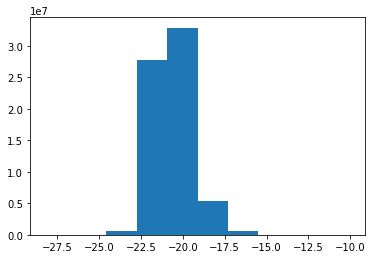

In [9]:
plt.hist(M_z)

Text(0, 0.5, 'N_GC')

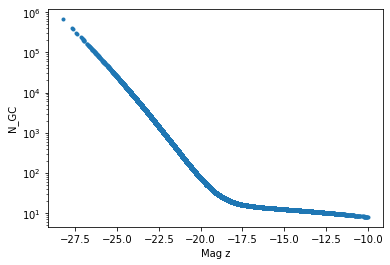

In [10]:
plt.yscale('log')
plt.plot(M_z, N_GC, '.')
plt.xlabel('Mag z')
plt.ylabel('N_GC')

In [11]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [12]:
igroup_ID = mem['groupID']

In [13]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [14]:
M_group = group['log M_h [M_sun/h]'] #[M_sun/h]

In [15]:
h = 0.7                    #Planck parameters
M_group = 10**(M_group)*h  # [M_sun], unit in catalog is log10 Msun

In [16]:
print(M_group)

[1.94624738e+15 1.00368640e+15 1.36929821e+15 ... 3.46017481e+11
 1.69940949e+12 2.15574824e+11]


In [17]:
group_ID = group['groupID'] #group ID correspond to M_group

- find galaxies in the same group;

- sum up their GCs and plot M_h of group vs. #GCs.

In [18]:
#create array to save #GCs in groups
N_GC_group = np.zeros(len(group_ID))

In [81]:
import time
t0 = time.time()

In [82]:
for i in range(10600, 11000): #len(group_ID)):
    for j in range(0, len(igroup_ID)):
        if group_ID[i] == igroup_ID[j]:
            #print(i,j)
            N_GC_group[i] += N_GC[j]

In [83]:
t1 = time.time()
print('running time', t1-t0)

running time 11296.505564212799


In [29]:
print(len(igroup_ID), len(group_ID))

67197600 51440885


In [84]:
N_save3 = np.zeros(400)
M_save3 = np.zeros(400)
ii = 0
for i in range (10600,11000):
    N_save3 [ii] = N_GC_group[i]
    M_save3[ii]  = M_group[i]
    ii +=1

In [88]:
print(len(N_save), M_save)

10600 [1.94624738e+15 1.00368640e+15 1.36929821e+15 ... 1.06046915e+14
 1.43812965e+14 2.87076763e+14]


Text(0, 0.5, 'N_GC')

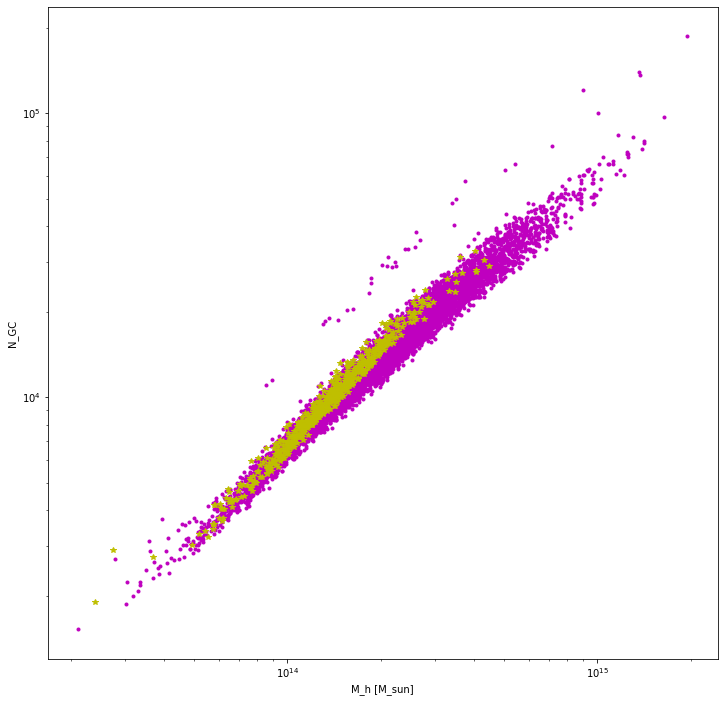

In [86]:
plt.figure(figsize=(12,12))
plt.plot(M_save, N_save, 'm.')
plt.plot(M_save3, N_save3, 'y*')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('N_GC')

In [40]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [41]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [42]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [43]:
check = Atlas_H['check T F central']
sum_NGC = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

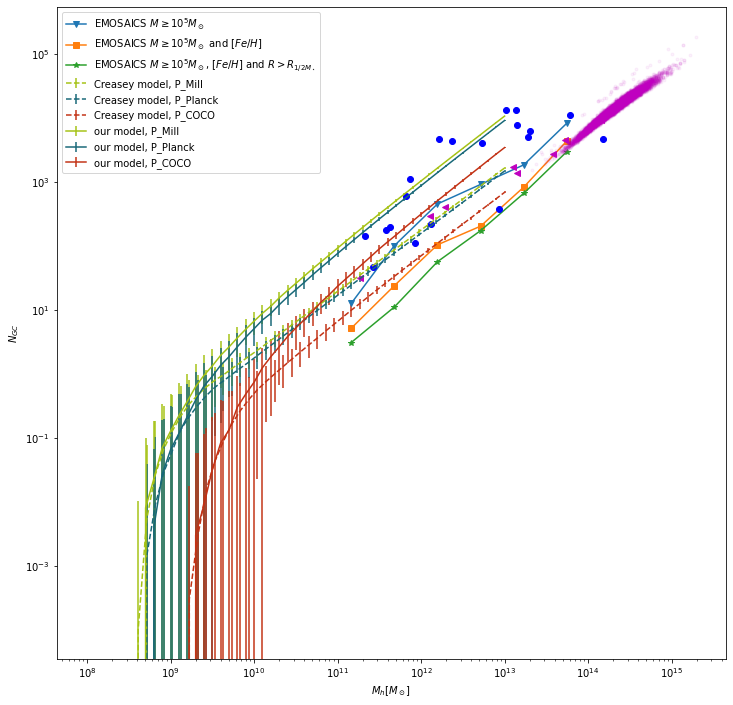

In [90]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_save, N_save, 'm.', alpha=0.05)
    
for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen')
    #elif check[i] == 1.5:
    #    plt.plot(M_h_array[i],sum_NGC[i], 'b*')#, label = '#GCs in halos, fake cen')
    #elif check[i] == 0:
    #    plt.plot(M_h_array[i],sum_NGC[i], 'b+')#, label = '#GCs in halos, single gal')
plt.plot(M_test2, N_test2, 'm<')

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()#loc=(1.1,0))
#plt.savefig('tot_GC2.pdf')
plt.show()